## Importing the Necessary Libraries

In [1]:
import re
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import warnings
import plotnine as p9  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore
import scipy  # type: ignore
import geopandas as gpd  # type: ignore
import geodatasets  # type: ignore
from scipy.stats import entropy  # type: ignore

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
plt.style.use("fivethirtyeight")

## Loading the Metadata File and Exploring it

In [2]:
major_df = pd.read_csv("../data/metadata.csv")

In [3]:
major_df.head()

,#,SE id(SA),Accession,GI number,Version,Se ID,Sequence Length,GB comment,GB create date,GB update date,Percent non-ACGT,SE id(SSAM),PAT id(SSAM),Name,Locus Name,Isolate Name,Clone Name,Georegion,Country,Sampling City,Sampling Year,Sampling Year Upper,Patient Age,Patient Health,Organism,Subtype,Phenotype,Coreceptor,Sample Tissue,Culture Method,Molecule type,Drug Naive,Problematic Sequence,Viral load,CD4 count,CD8 count,Days from Infection,Days from Seroconversion,Days from first Sample,Sequencing method,Amplification strategy,Fiebig Stage,Anno,Days from treatment start,Days from treatment end,Vaccine status,RIP subtype
0,1,795536,MF990522,1246707969,MF990522.1,795536,2470,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.3,795536,NaN,FOST145,MF990522,FOST145,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C
1,2,795537,MF990521,1246707968,MF990521.1,795537,2135,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,1.7,795537,NaN,FOST144,MF990521,FOST144,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C
2,3,795538,MF990520,1246707967,MF990520.1,795538,2556,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.3,795538,NaN,FOST143,MF990520,FOST143,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C
3,4,795539,MF990519,1246707966,MF990519.1,795539,2589,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.0,795539,NaN,FOST142,MF990519,FOST142,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C
4,5,795540,MF990518,1246707965,MF990518.1,795540,2547,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.2,795540,NaN,FOST141,MF990518,FOST141,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C


In [4]:
remaining_metadata_df = pd.read_csv(
    "../data/processed/output_fragments/Advanced_results_NoSEQ.txt",
    sep="\t",
    index_col=False,
)
remaining_metadata_df.head()

,#,SE id(SSAM),PAT id(SSAM),Name,Country,Sampling Year,Subtype,Days from Infection,Days from Seroconversion,RIP subtype,Se ID,Sequence Length,Patient Id,Patient Sex,Risk Factor,Infection Year,SE id(SA),Accession
0,1,1067058,154330.0,M339A,SOUTH AFRICA,2014,C,NaN,NaN,C,1067058,979,154330.0,F,Not Recorded,NaN,1067058,MZ706941
1,2,1067059,154669.0,M338A,UGANDA,2014,D,NaN,NaN,D,1067059,992,154669.0,F,Not Recorded,NaN,1067059,MZ706940
2,3,1067060,154715.0,M337A,UGANDA,2014,A1,NaN,NaN,A1,1067060,975,154715.0,F,Not Recorded,NaN,1067060,MZ706939
3,4,1067061,153839.0,M336A,UGANDA,2014,A1D,NaN,NaN,A1D,1067061,964,153839.0,F,Not Recorded,NaN,1067061,MZ706938
4,5,1067062,153945.0,M335A,UGANDA,2013,A1,NaN,NaN,A1,1067062,979,153945.0,F,Not Recorded,NaN,1067062,MZ706937


In [5]:
df = pd.concat([major_df, remaining_metadata_df], join="outer", ignore_index=True)
df

,#,SE id(SA),Accession,GI number,Version,Se ID,Sequence Length,GB comment,GB create date,GB update date,Percent non-ACGT,SE id(SSAM),PAT id(SSAM),Name,Locus Name,Isolate Name,Clone Name,Georegion,Country,Sampling City,Sampling Year,Sampling Year Upper,Patient Age,Patient Health,Organism,Subtype,Phenotype,Coreceptor,Sample Tissue,Culture Method,Molecule type,Drug Naive,Problematic Sequence,Viral load,CD4 count,CD8 count,Days from Infection,Days from Seroconversion,Days from first Sample,Sequencing method,Amplification strategy,Fiebig Stage,Anno,Days from treatment start,Days from treatment end,Vaccine status,RIP subtype,Patient Id,Patient Sex,Risk Factor,Infection Year
0,1,795536,MF990522,1.246708e+09,MF990522.1,795536,2470,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.3,795536,NaN,FOST145,MF990522,FOST145,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012.0,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN
1,2,795537,MF990521,1.246708e+09,MF990521.1,795537,2135,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,1.7,795537,NaN,FOST144,MF990521,FOST144,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012.0,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN
2,3,795538,MF990520,1.246708e+09,MF990520.1,795538,2556,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.3,795538,NaN,FOST143,MF990520,FOST143,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012.0,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN
3,4,795539,MF990519,1.246708e+09,MF990519.1,795539,2589,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.0,795539,NaN,FOST142,MF990519,FOST142,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012.0,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN
4,5,795540,MF990518,1.246708e+09,MF990518.1,795540,2547,GenBank staff is unable to verify sequence and...,2017-10-01,2017-10-01,0.2,795540,NaN,FOST141,MF990518,FOST141,NaN,AFR SSA,SOUTH AFRICA,NaN,2012,2012.0,NaN,NaN,HIV-1,C,NaN,NaN,plasma,uncultured,RNA,no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233222,1996,1182836,MZ766586,NaN,NaN,1182836,8945,NaN,NaN,NaN,NaN,1182836,148912.0,074-AP-115-1-5_w0_44,NaN,NaN,NaN,NaN,BOTSWANA,NaN,2015,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,148912.0,NaN,Mother-&gt;Child,NaN
233223,1997,1182837,MZ766585,NaN,NaN,1182837,8936,NaN,NaN,NaN,NaN,1182837,148912.0,074-AP-115-1-5_w0_42,NaN,NaN,NaN,NaN,BOTSWANA,NaN,2015,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,148912.0,NaN,Mother-&gt;Child,NaN
233224,1998,1182838,MZ766584,NaN,NaN,1182838,8948,NaN,NaN,NaN,NaN,1182838,148866.0,074-AP-113-1-6_w84_41,NaN,NaN,NaN,NaN,BOTSWANA,NaN,2015,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07C,148866.0,NaN,Mother-&gt;Child,NaN
233225,1999,1182839,MZ766583,NaN,NaN,1182839,8948,NaN,NaN,NaN,NaN,1182839,148866.0,074-AP-113-1-6_w84_33,NaN,NaN,NaN,NaN,BOTSWANA,NaN,2015,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,588.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07C,148866.0,NaN,Mother-&gt;Child,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233227 entries, 0 to 233226
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   #                          233227 non-null  int64  
 1   SE id(SA)                  233227 non-null  int64  
 2   Accession                  233227 non-null  object 
 3   GI number                  231227 non-null  float64
 4   Version                    231227 non-null  object 
 5   Se ID                      233227 non-null  int64  
 6   Sequence Length            233227 non-null  int64  
 7   GB comment                 136566 non-null  object 
 8   GB create date             231227 non-null  object 
 9   GB update date             231227 non-null  object 
 10  Percent non-ACGT           231227 non-null  float64
 11  SE id(SSAM)                233227 non-null  int64  
 12  PAT id(SSAM)               172701 non-null  float64
 13  Name                       23

## Optimising the DataFrame to reduce memory usage and Removing Duplicates

In [12]:
# Downcast numeric types to the most efficient representation
for col in df.select_dtypes(include=["float"]):
    df[col] = pd.to_numeric(df[col], downcast="float")

for col in df.select_dtypes(include=["int"]):
    df[col] = pd.to_numeric(df[col], downcast="integer")

# Convert object types to category if they have few unique values
for col in df.select_dtypes(include=["object"]).columns:
    unique_values = df[col].nunique()
    total_values = len(df[col])
    if unique_values / total_values < 0.5:  # If more than 50% of values are repetitive
        df[col] = df[col].astype("category")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217227 entries, 0 to 217226
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   #                          217227 non-null  int16   
 1   SE id(SA)                  217227 non-null  int32   
 2   Accession                  217227 non-null  object  
 3   GI number                  215227 non-null  float64 
 4   Version                    215227 non-null  object  
 5   Se ID                      217227 non-null  int32   
 6   Sequence Length            217227 non-null  int16   
 7   GB comment                 128591 non-null  category
 8   GB create date             215227 non-null  category
 9   GB update date             215227 non-null  category
 10  Percent non-ACGT           215227 non-null  float32 
 11  SE id(SSAM)                217227 non-null  int32   
 12  PAT id(SSAM)               160380 non-null  float32 
 13  Name          

In [14]:
# Drop Duplicate Entries in the Dataset
df = df.drop_duplicates(subset="Accession").reset_index(drop=True)

In [15]:
df.describe()

,#,SE id(SA),GI number,Se ID,Sequence Length,Percent non-ACGT,SE id(SSAM),PAT id(SSAM),Sampling Year,Sampling Year Upper,Problematic Sequence,Viral load,CD4 count,CD8 count,Days from first Sample,Anno,Days from treatment start,Days from treatment end,Patient Id,Infection Year
count,217227.000000,2.172270e+05,2.152270e+05,2.172270e+05,217227.000000,215227.000000,2.172270e+05,160380.000000,217227.000000,215227.000000,215227.0,4.050500e+04,18635.000000,888.000000,13243.000000,215227.000000,1273.000000,0.0,871.000000,0.0
mean,7364.081712,5.993827e+05,8.730459e+08,5.993827e+05,1466.375962,0.300673,5.993827e+05,65229.878906,2007.145442,2007.188477,0.0,5.849366e+06,376.632782,1073.051758,436.294556,0.963750,128.807541,NaN,147473.265625,NaN
std,4752.650416,3.396772e+05,7.656740e+08,3.396772e+05,1542.816333,0.648953,3.396772e+05,42715.925781,6.219149,6.169222,0.0,1.102151e+08,296.871216,461.330872,680.648682,0.186912,274.786102,NaN,11757.750000,NaN
min,1.000000,2.810000e+02,6.023800e+04,2.810000e+02,55.000000,0.000000,2.810000e+02,5.000000,1990.000000,1990.000000,0.0,1.000000e+00,0.000000,96.000000,0.000000,0.000000,-779.000000,NaN,116100.000000,NaN
25%,2960.000000,3.340425e+05,2.703129e+08,3.340425e+05,612.000000,0.000000,3.340425e+05,31101.000000,2003.000000,2003.000000,0.0,2.238700e+04,191.000000,744.000000,0.000000,1.000000,0.000000,NaN,148701.000000,NaN
50%,7125.000000,5.749020e+05,5.487912e+08,5.749020e+05,1023.000000,0.000000,5.749020e+05,53227.000000,2007.000000,2007.000000,0.0,8.730000e+04,329.000000,1034.000000,153.000000,1.000000,0.000000,NaN,153839.000000,NaN
75%,11475.000000,8.356355e+05,1.383729e+09,8.356355e+05,1491.000000,0.300000,8.356355e+05,98020.250000,2011.000000,2011.000000,0.0,3.300000e+05,500.000000,1280.000000,574.000000,1.000000,128.000000,NaN,154339.500000,NaN
max,16000.000000,1.285059e+06,2.783937e+09,1.285059e+06,10414.000000,7.000000,1.285059e+06,172034.000000,2024.000000,2024.000000,0.0,5.940000e+09,10001.000000,5749.000000,3592.000000,1.000000,2068.000000,NaN,154879.000000,NaN


In [16]:
df.to_csv("correct_metadata.csv")

## Metadata Analysis

In [14]:
year_counts = df['Sampling Year'].value_counts()
year_counts.columns = ['Year', 'Counts']

In [16]:
year_counts.to_csv('year_counts.csv')

In [17]:
country_counts = df['Country'].value_counts()
country_counts.columns = ['Country', 'Counts']

In [18]:
country_counts.to_csv('country_counts.csv')

In [12]:
subtype_count = df['Subtype'].value_counts()
subtype_count.columns = ['Subtype', 'Counts']

In [26]:
subtype_count.to_csv('subtype_count.csv')

In [13]:
# Country and subtype prevalence
subtype_counts_by_country = df.groupby(['Country', 'Subtype']).size().reset_index(name='Count')
subtype_counts_by_country = subtype_counts_by_country.sort_values(by=['Country', 'Count'], ascending = [True, False])
pivot_table = subtype_counts_by_country.pivot(index='Country',columns='Subtype', values='Count').fillna(0)

In [20]:
subtype_counts_by_country.to_csv('subtype_b_country_no_pivot.csv')

In [19]:
pivot_table.to_csv('subtype_accross_countries.csv')

### Missing Data Analysis

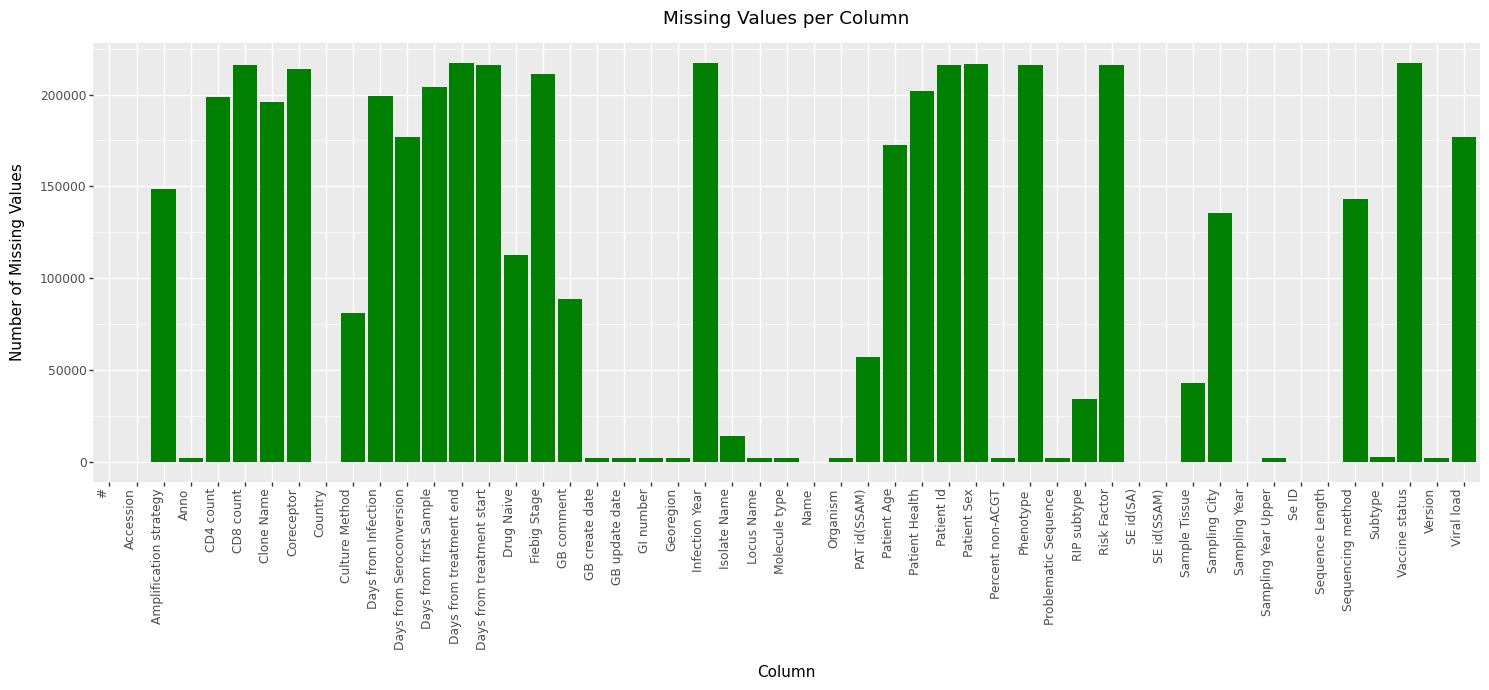

In [12]:
# Count missing values in each column
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ["Column", "MissingValues"]

# Plot missing values
plot_missing = (
    p9.ggplot(missing_values, p9.aes(x="Column", y="MissingValues"))
    + p9.geom_bar(stat="identity", fill="green")
    + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
    + p9.labs(
        title="Missing Values per Column", y="Number of Missing Values", x="Column"
    )
)
plot_missing = plot_missing + p9.theme(figure_size=(15, 7))
plot_missing.draw()

### Sample year Distribution

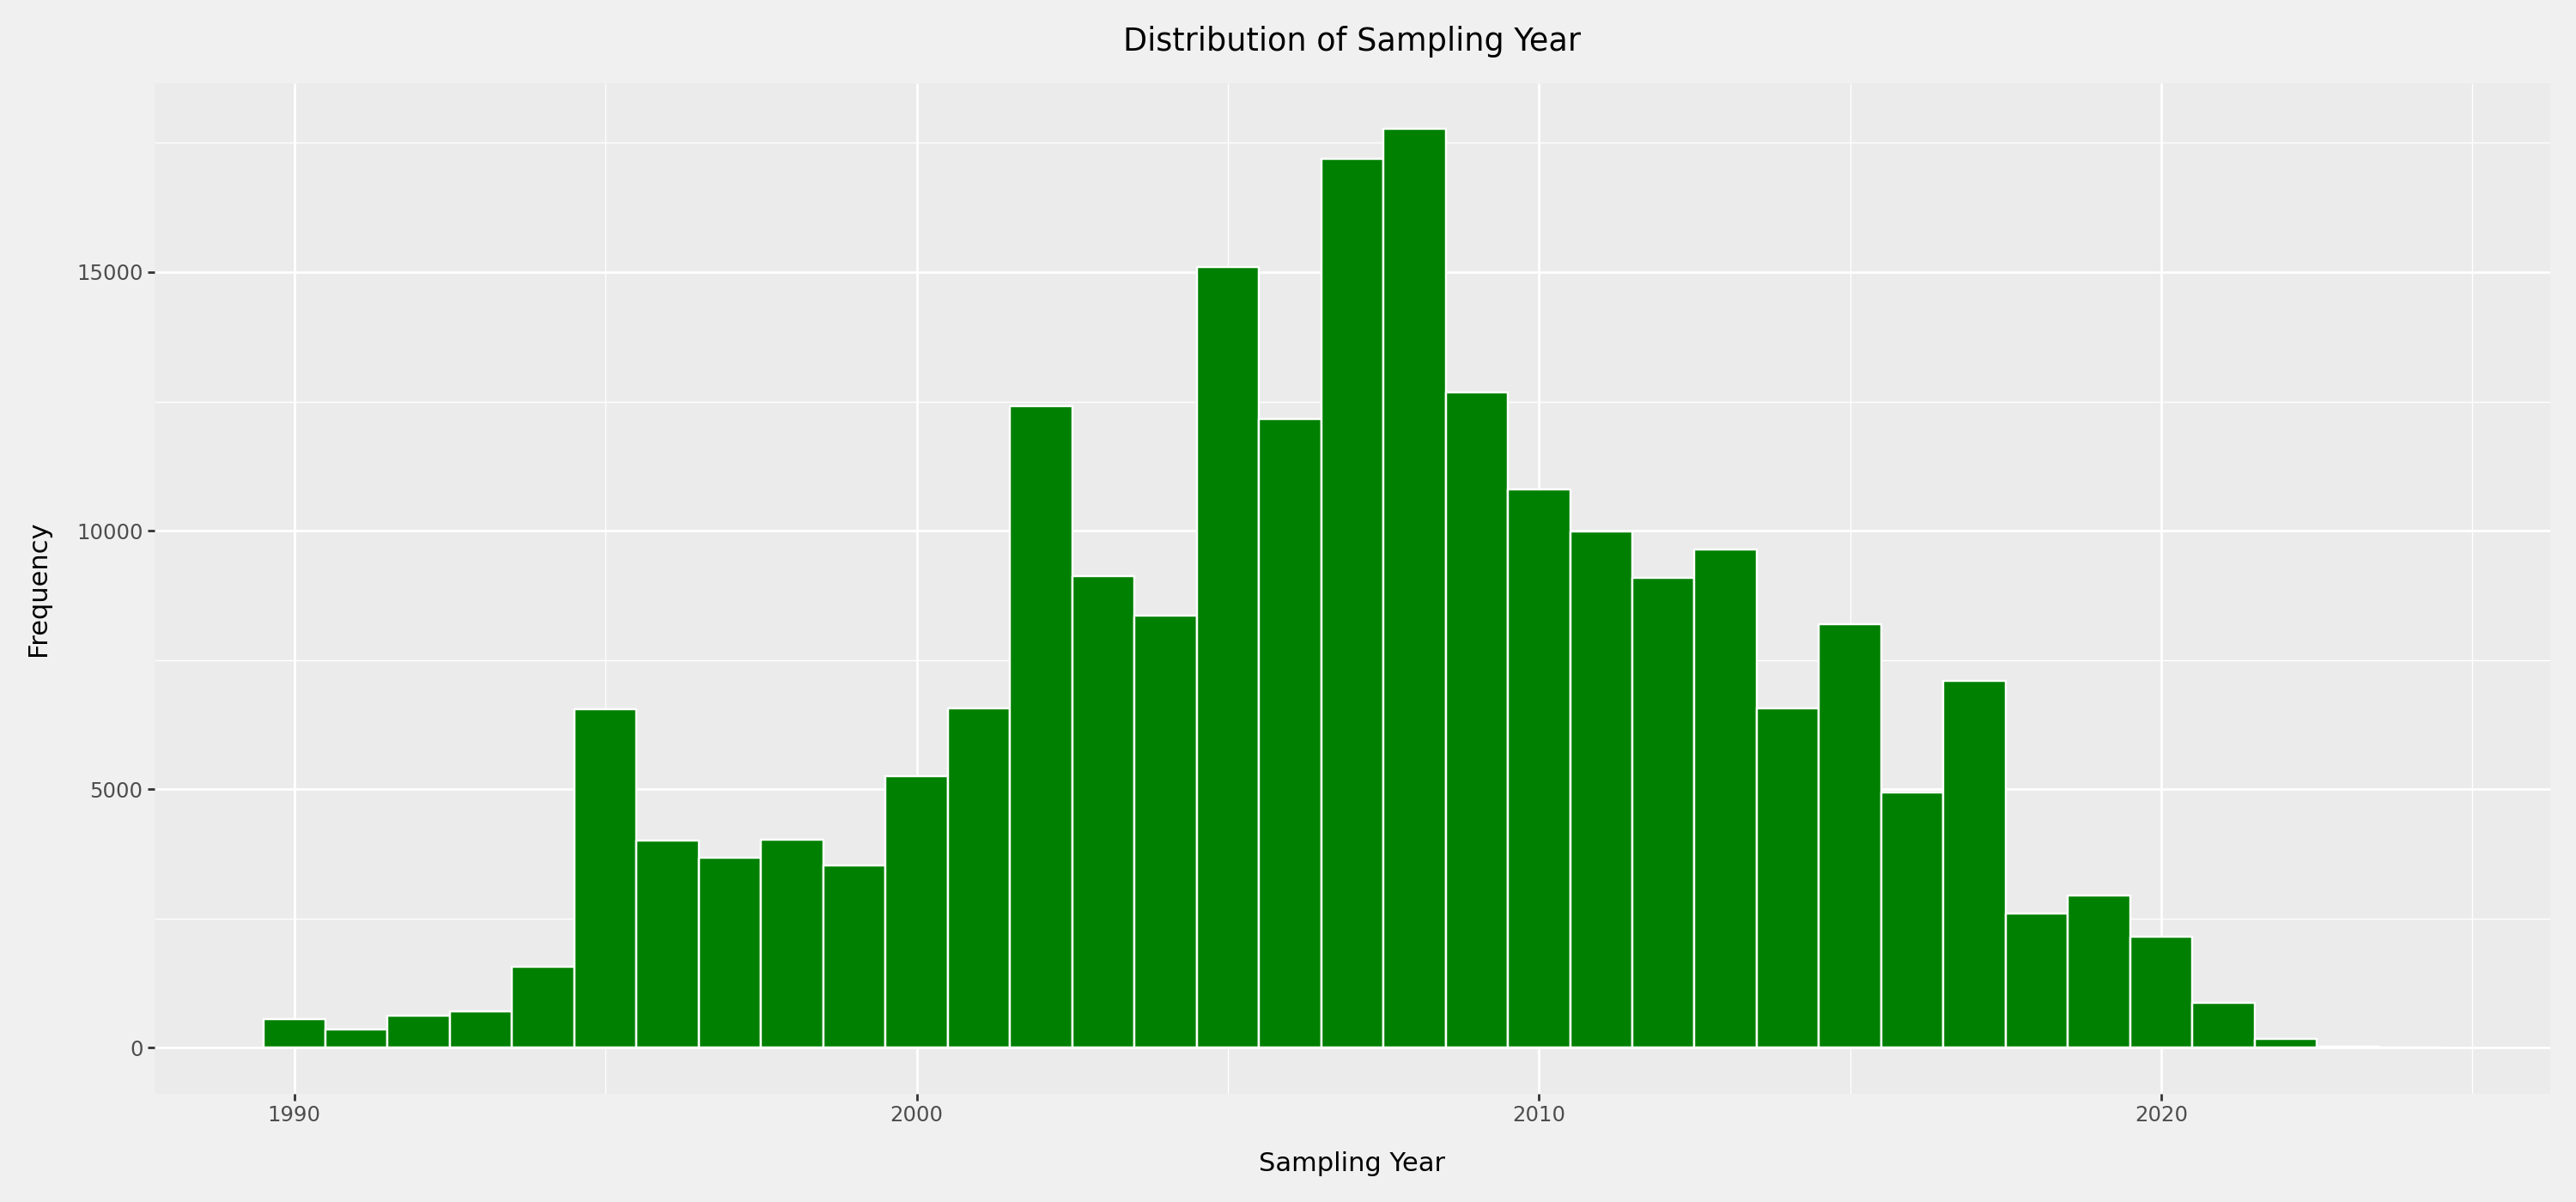

In [17]:
plot_sampling_year = (
    p9.ggplot(df, p9.aes(x="Sampling Year"))
    + p9.geom_histogram(binwidth=1, fill="green", color="white")
    + p9.labs(title="Distribution of Sampling Year", x="Sampling Year", y="Frequency")
    + p9.theme(figure_size=(15, 7))
)
print(plot_sampling_year)

### Geographical Distribution

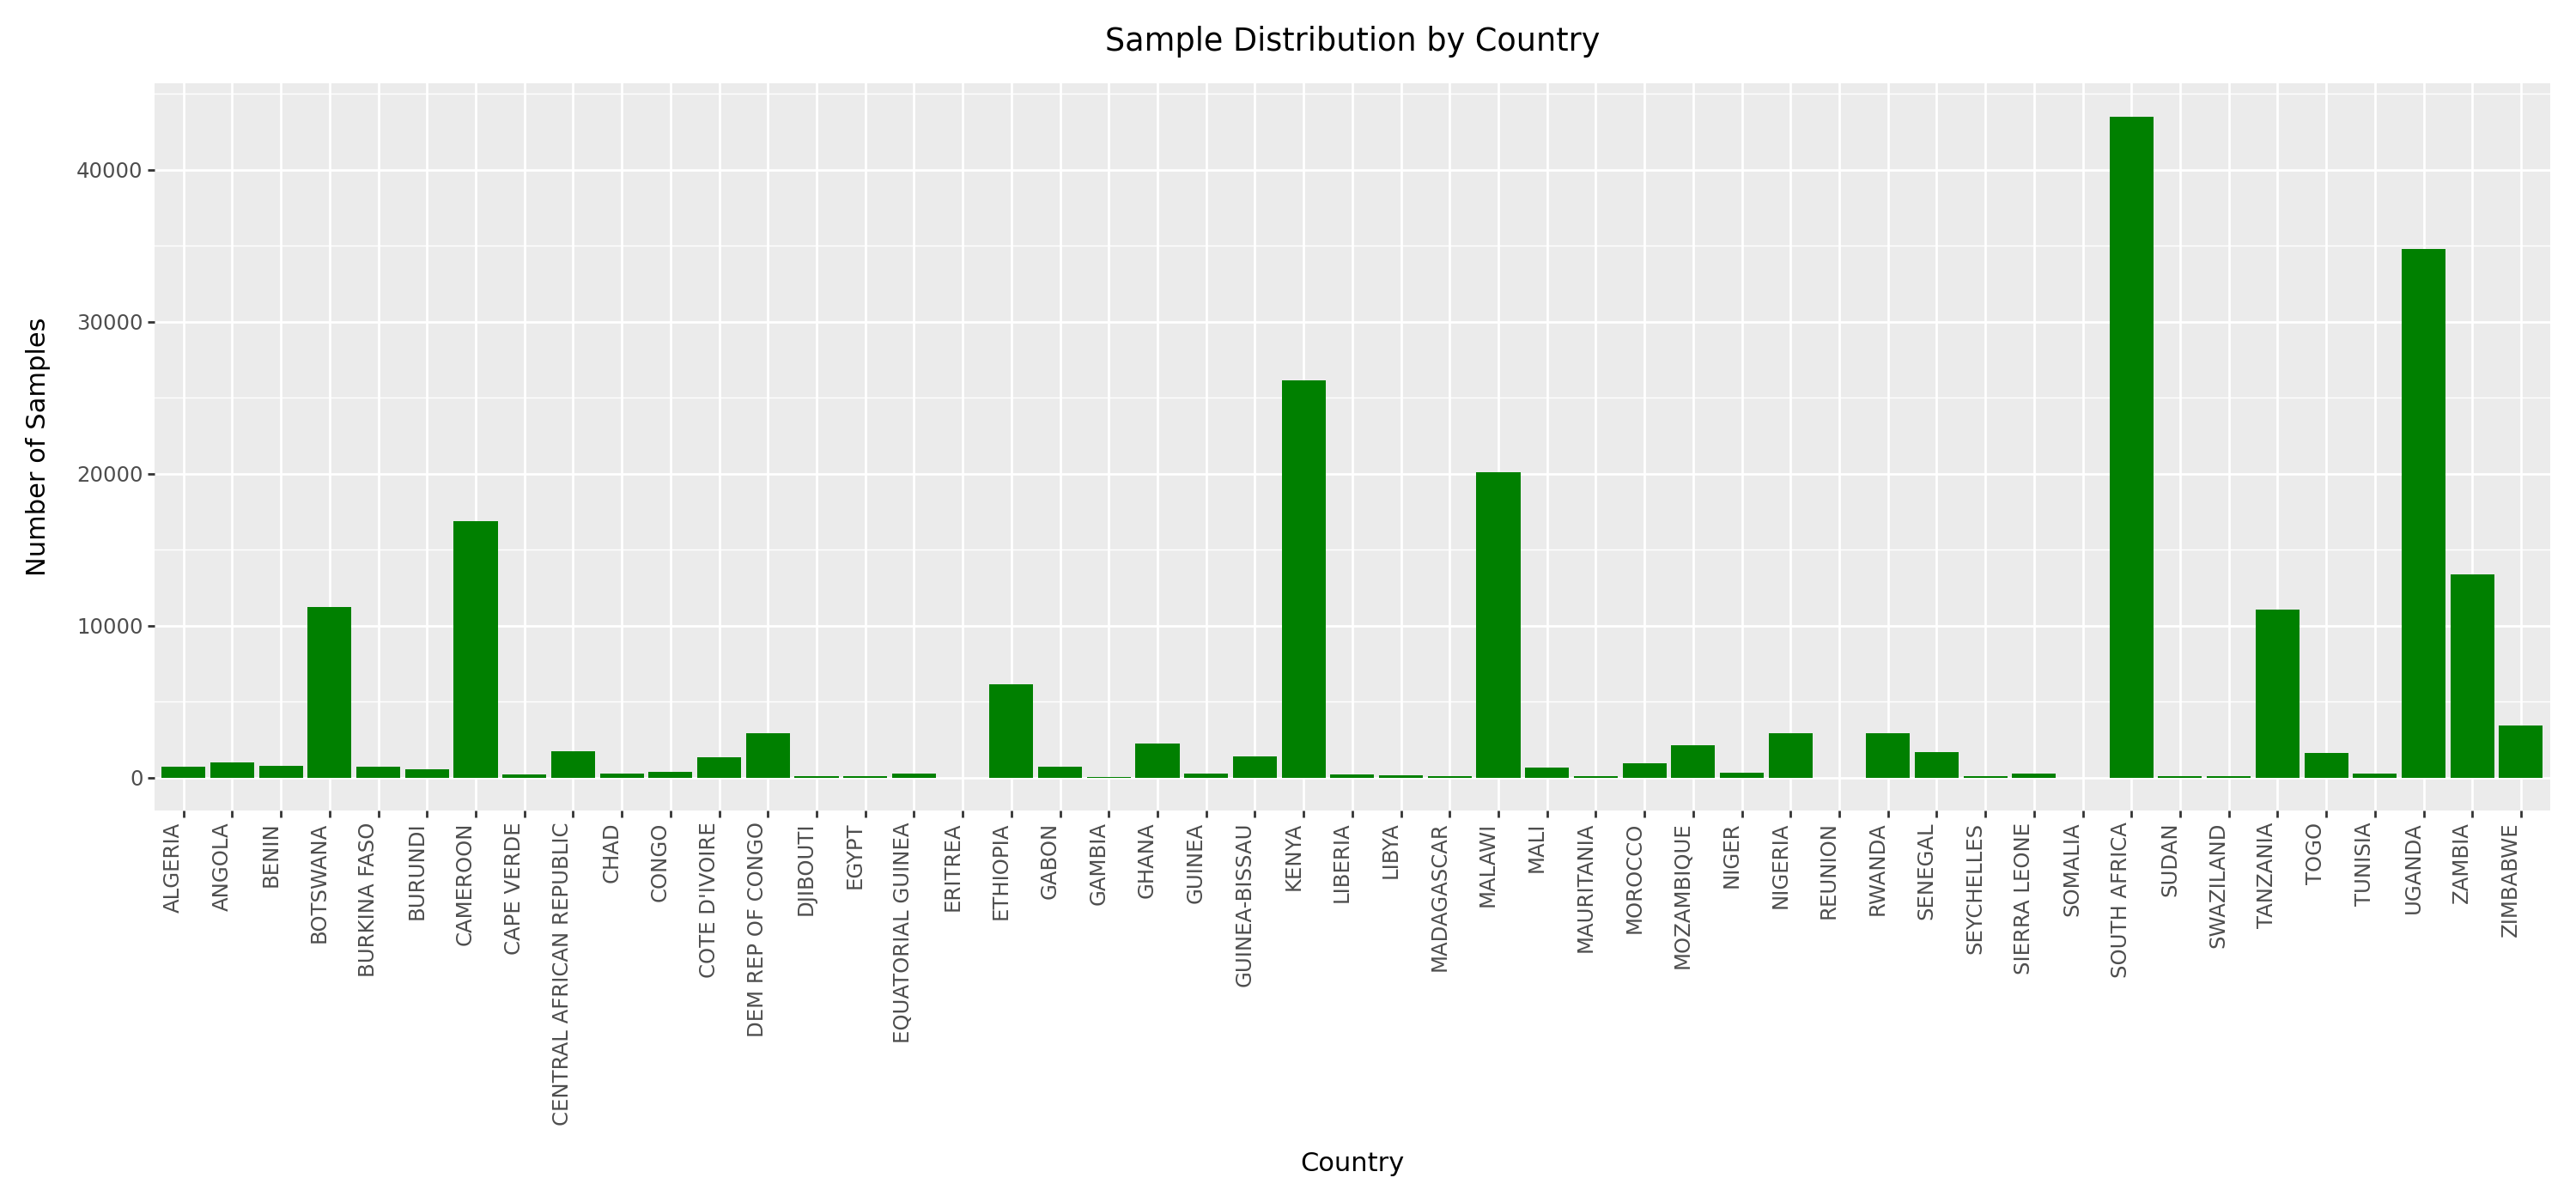

In [14]:
country_counts = df["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

# Plot geographical distribution
plot_geographical_distribution = (
    p9.ggplot(country_counts, p9.aes(x="Country", y="Count"))
    + p9.geom_bar(stat="identity", fill="green")
    + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
    + p9.labs(
        title="Sample Distribution by Country", y="Number of Samples", x="Country"
    )
    + p9.theme(figure_size=(15, 7))
)
print(plot_geographical_distribution)

### Sequence Length Analysis

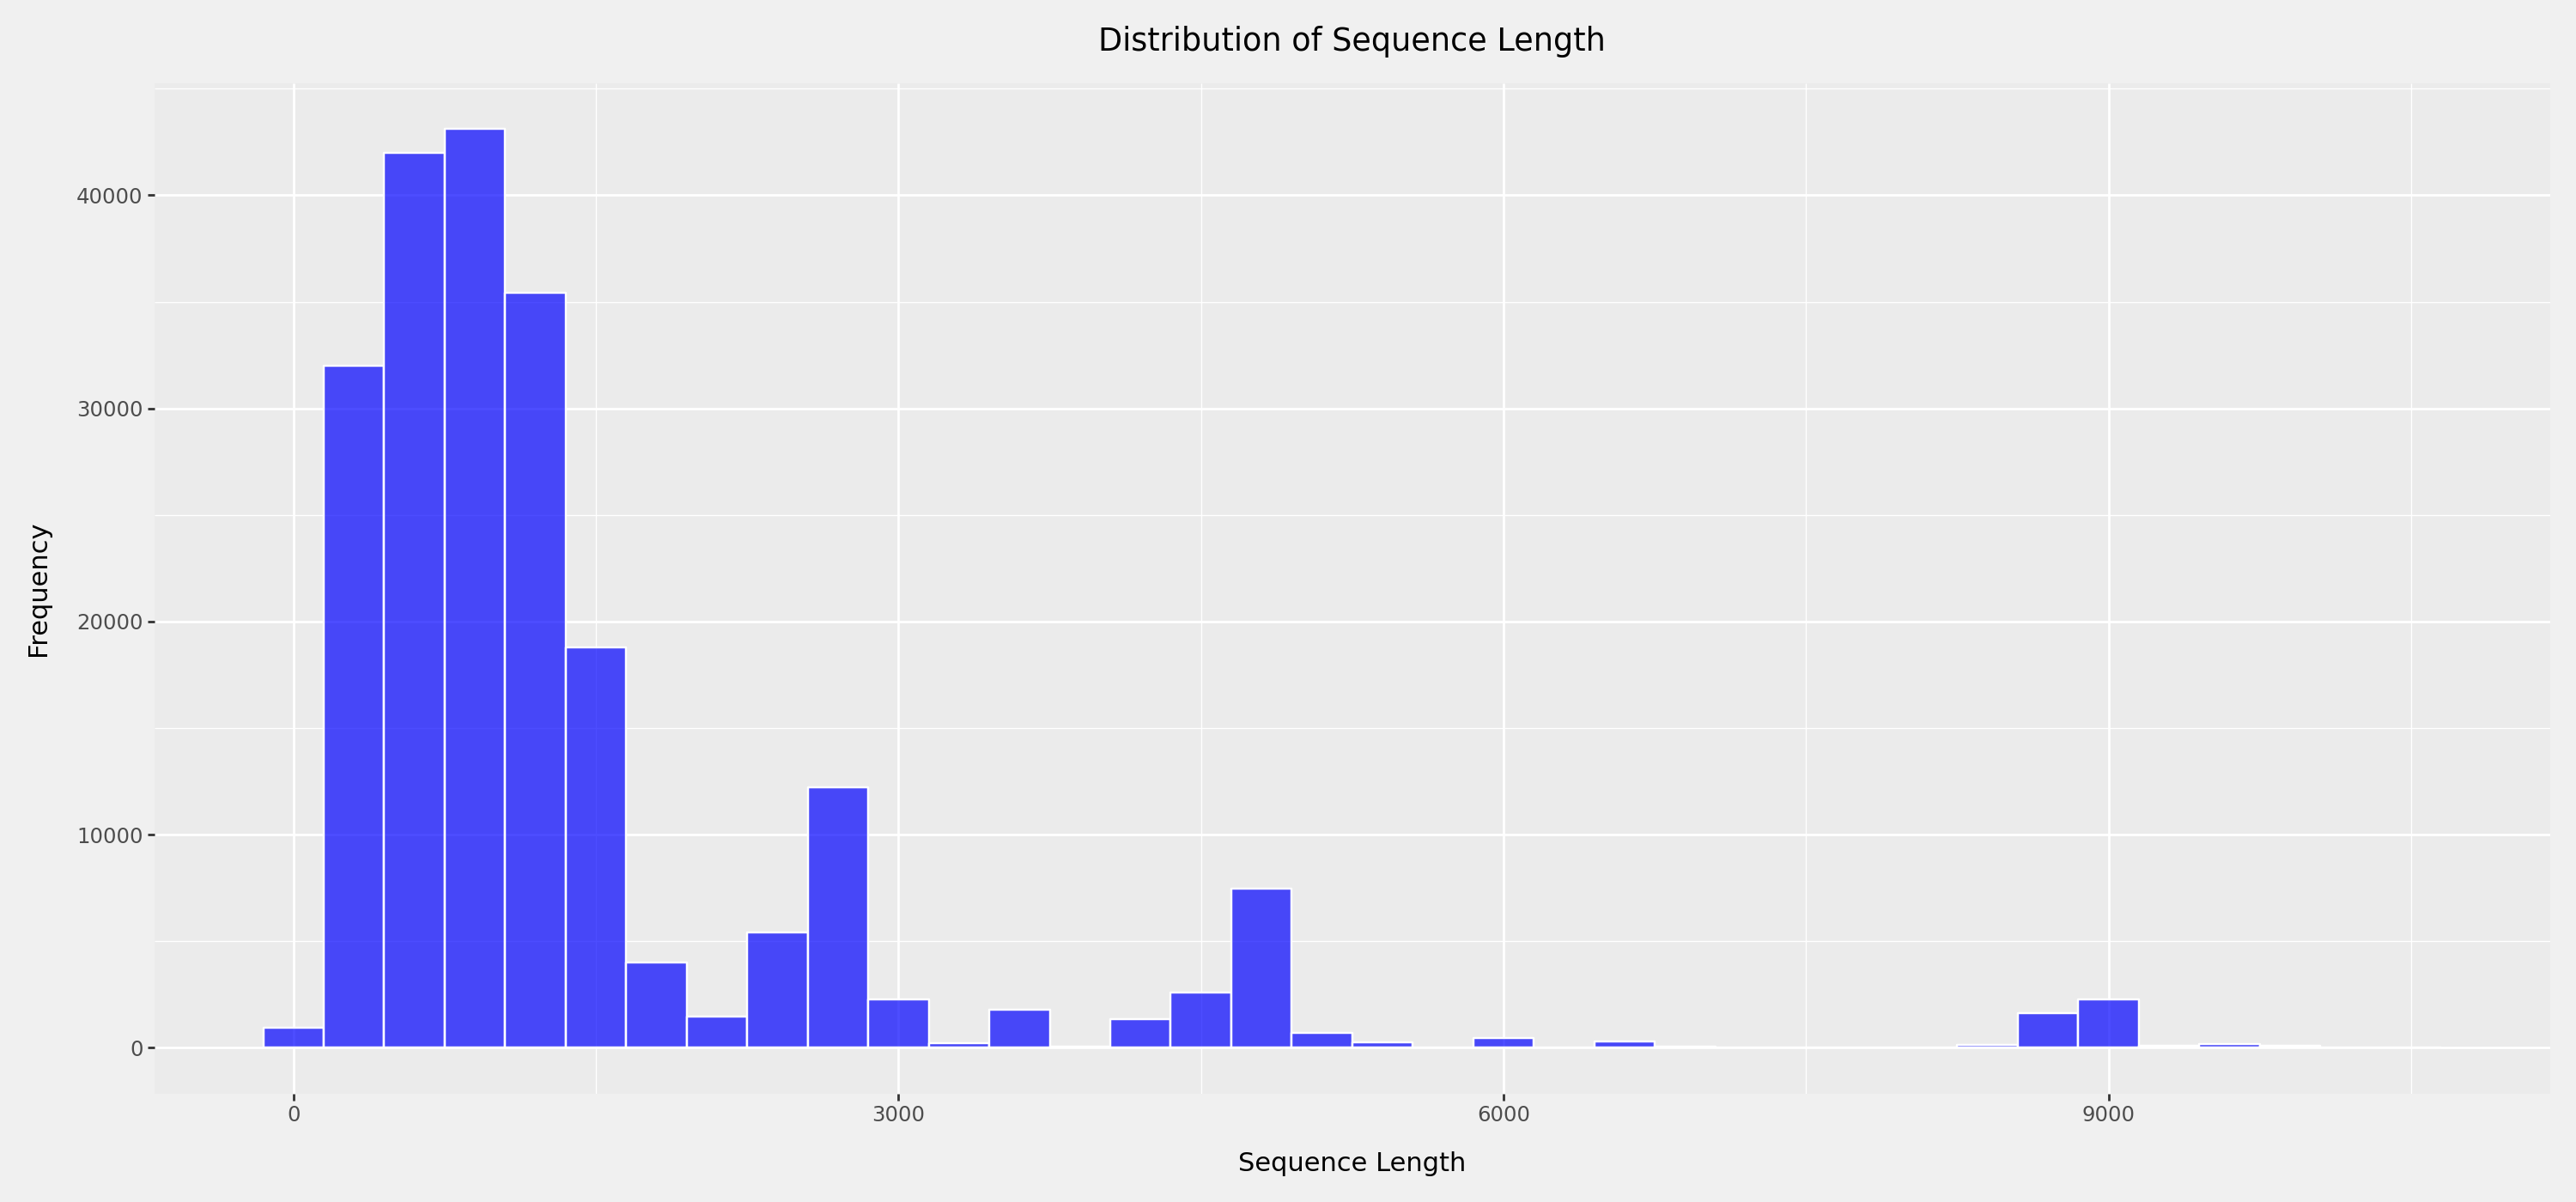

In [27]:
plot_sequence_length = (
    p9.ggplot(df, p9.aes(x="Sequence Length"))
    + p9.geom_histogram(binwidth=300, fill="blue", color="white", alpha=0.7)
    + p9.labs(
        title="Distribution of Sequence Length", x="Sequence Length", y="Frequency"
    )
    + p9.theme(figure_size=(15, 7))
)

print(plot_sequence_length)

### Coreceptor and Phenotype Analysis

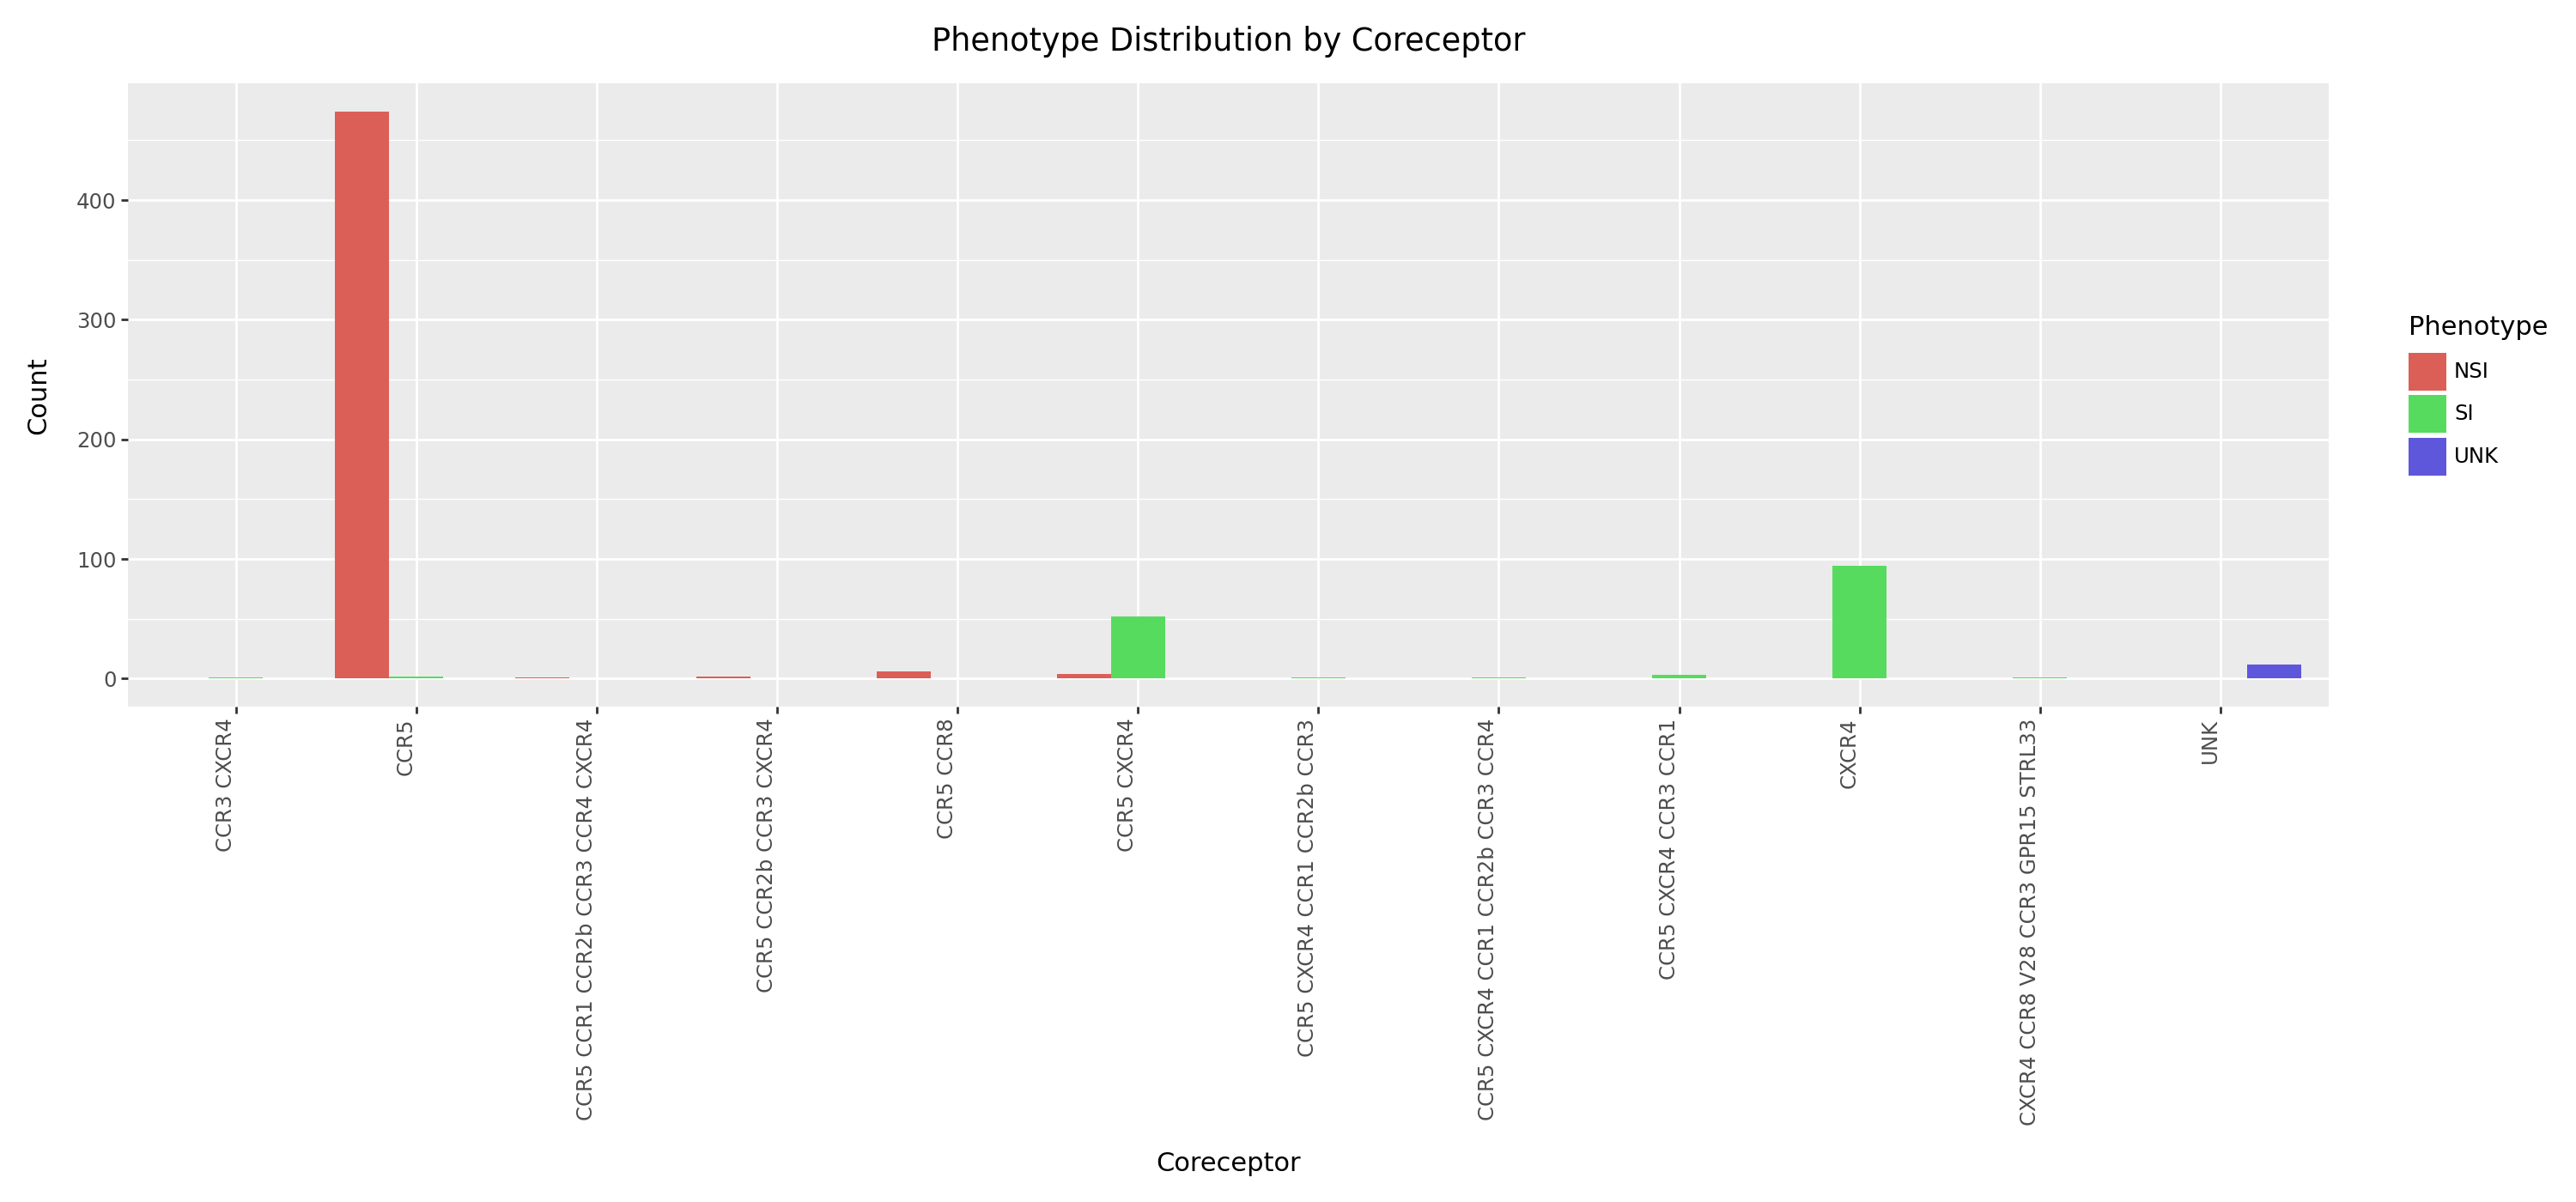

In [16]:
coreceptor_phenotype_counts = (
    df.groupby(["Coreceptor", "Phenotype"]).size().reset_index(name="Count")
)

plot_coreceptor_phenotype = (
    p9.ggplot(
        coreceptor_phenotype_counts, p9.aes(x="Coreceptor", y="Count", fill="Phenotype")
    )
    + p9.geom_bar(stat="identity", position="dodge")
    + p9.labs(title="Phenotype Distribution by Coreceptor", y="Count", x="Coreceptor")
    + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
    + p9.theme(figure_size=(15, 7))
)
print(plot_coreceptor_phenotype)

### Organism versus Subtype

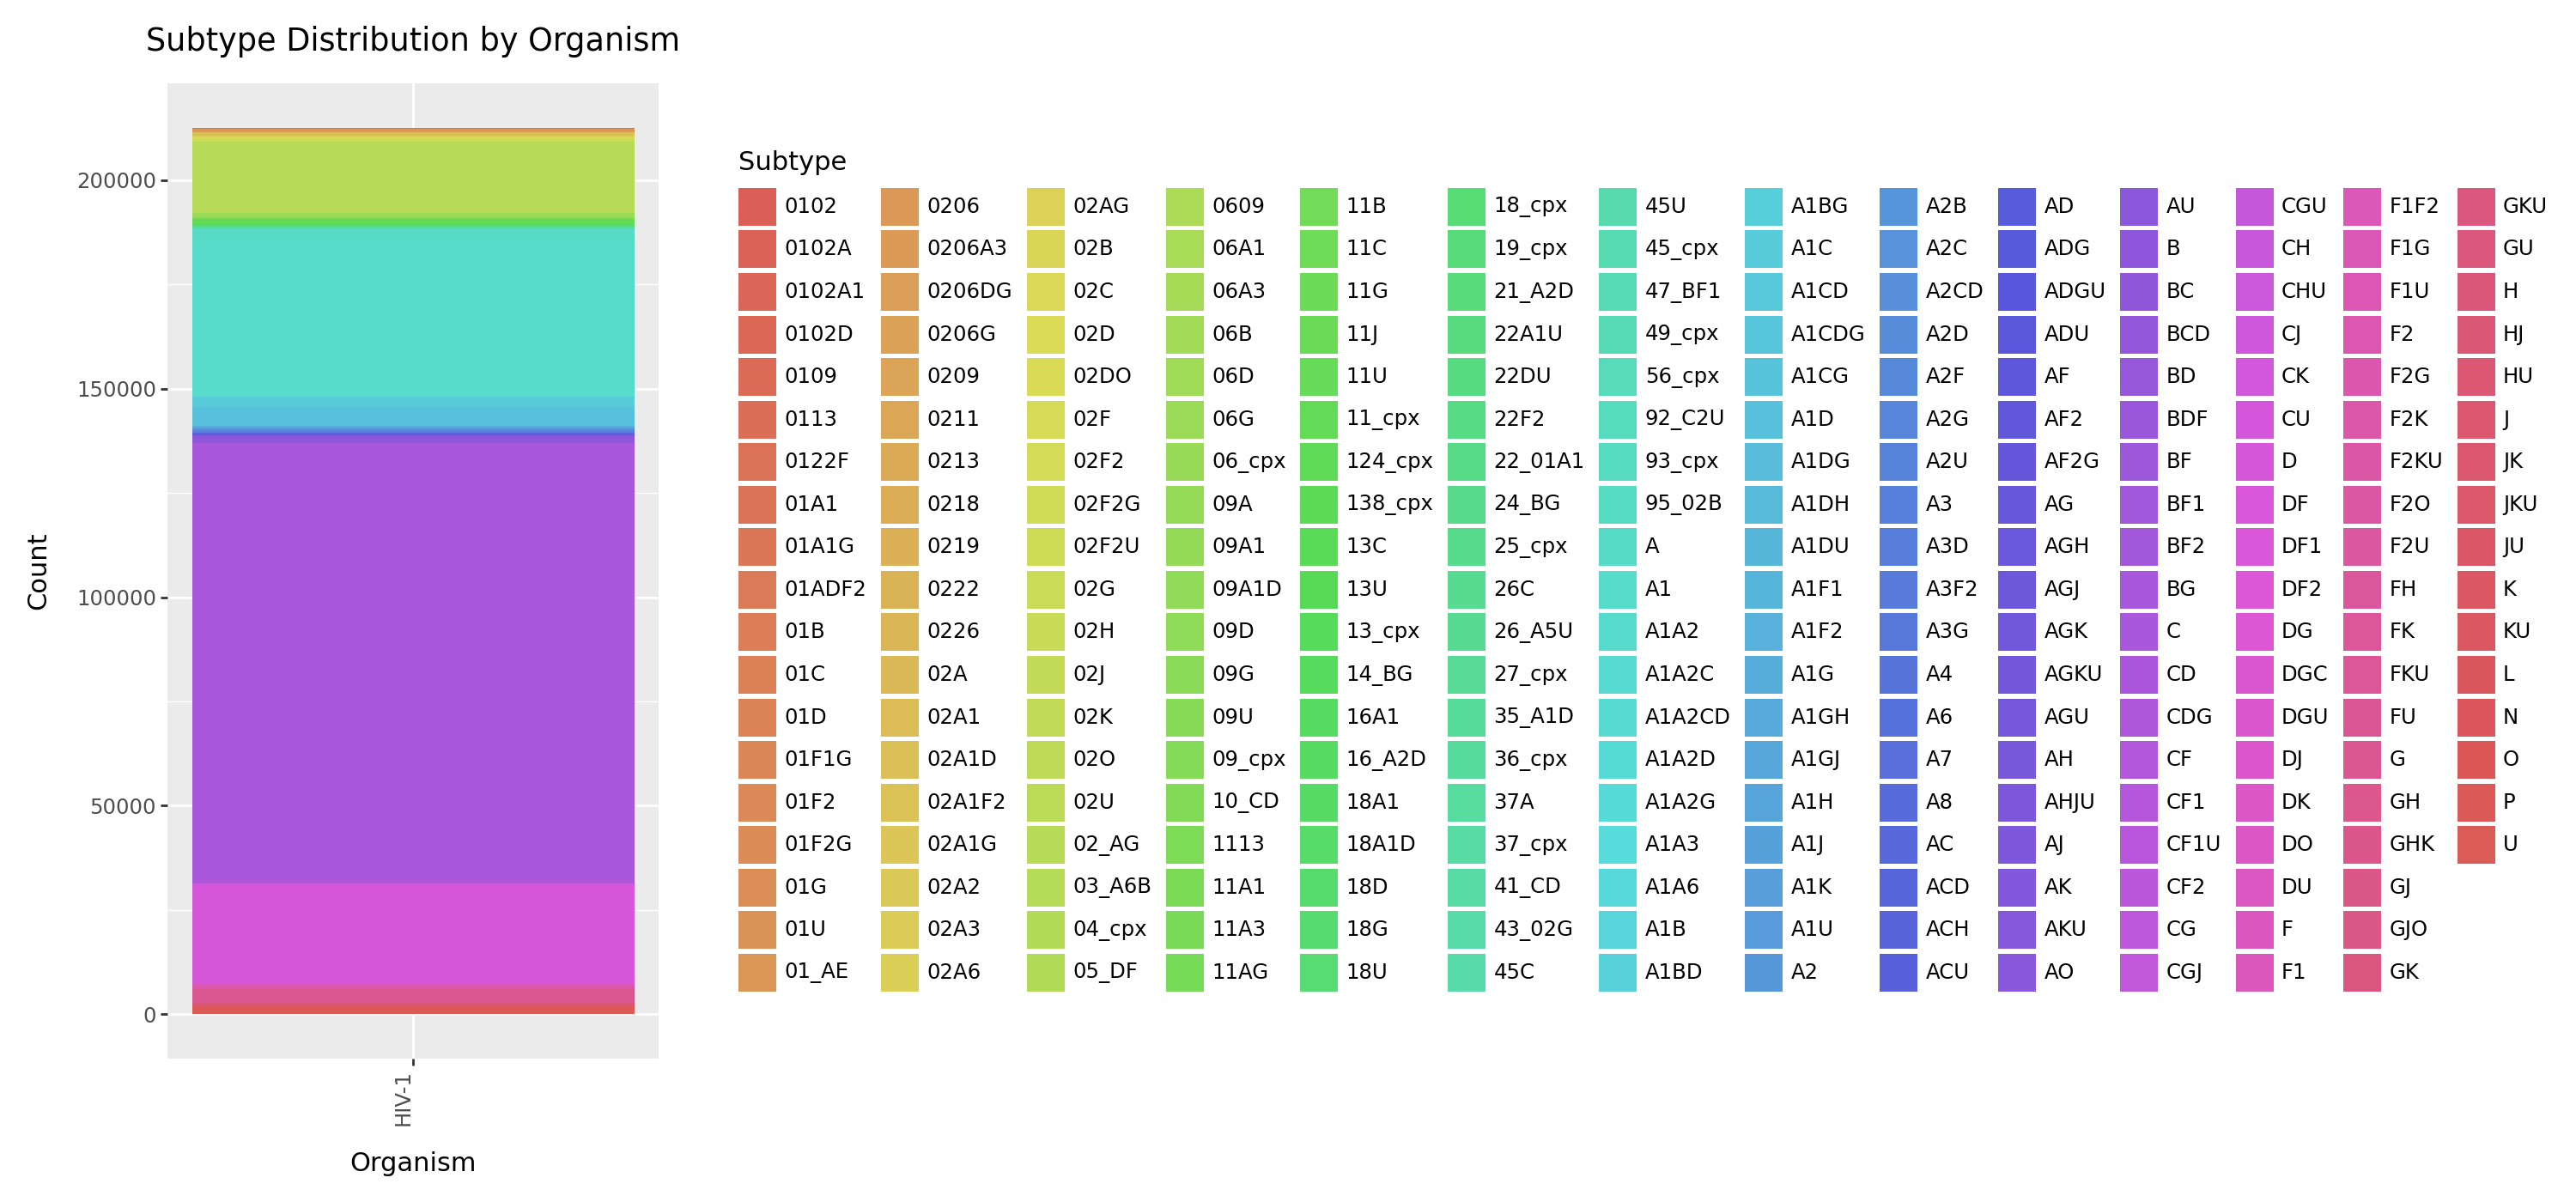

In [17]:
organism_subtype_counts = (
    df.groupby(["Organism", "Subtype"]).size().reset_index(name="Count")
)

plot_organism_subtype = (
    p9.ggplot(organism_subtype_counts, p9.aes(x="Organism", y="Count", fill="Subtype"))
    + p9.geom_bar(stat="identity", position="stack")
    + p9.labs(title="Subtype Distribution by Organism", y="Count", x="Organism")
    + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
    + p9.theme(figure_size=(15, 7))
)
print(plot_organism_subtype)

### Time Series Yearly Trend

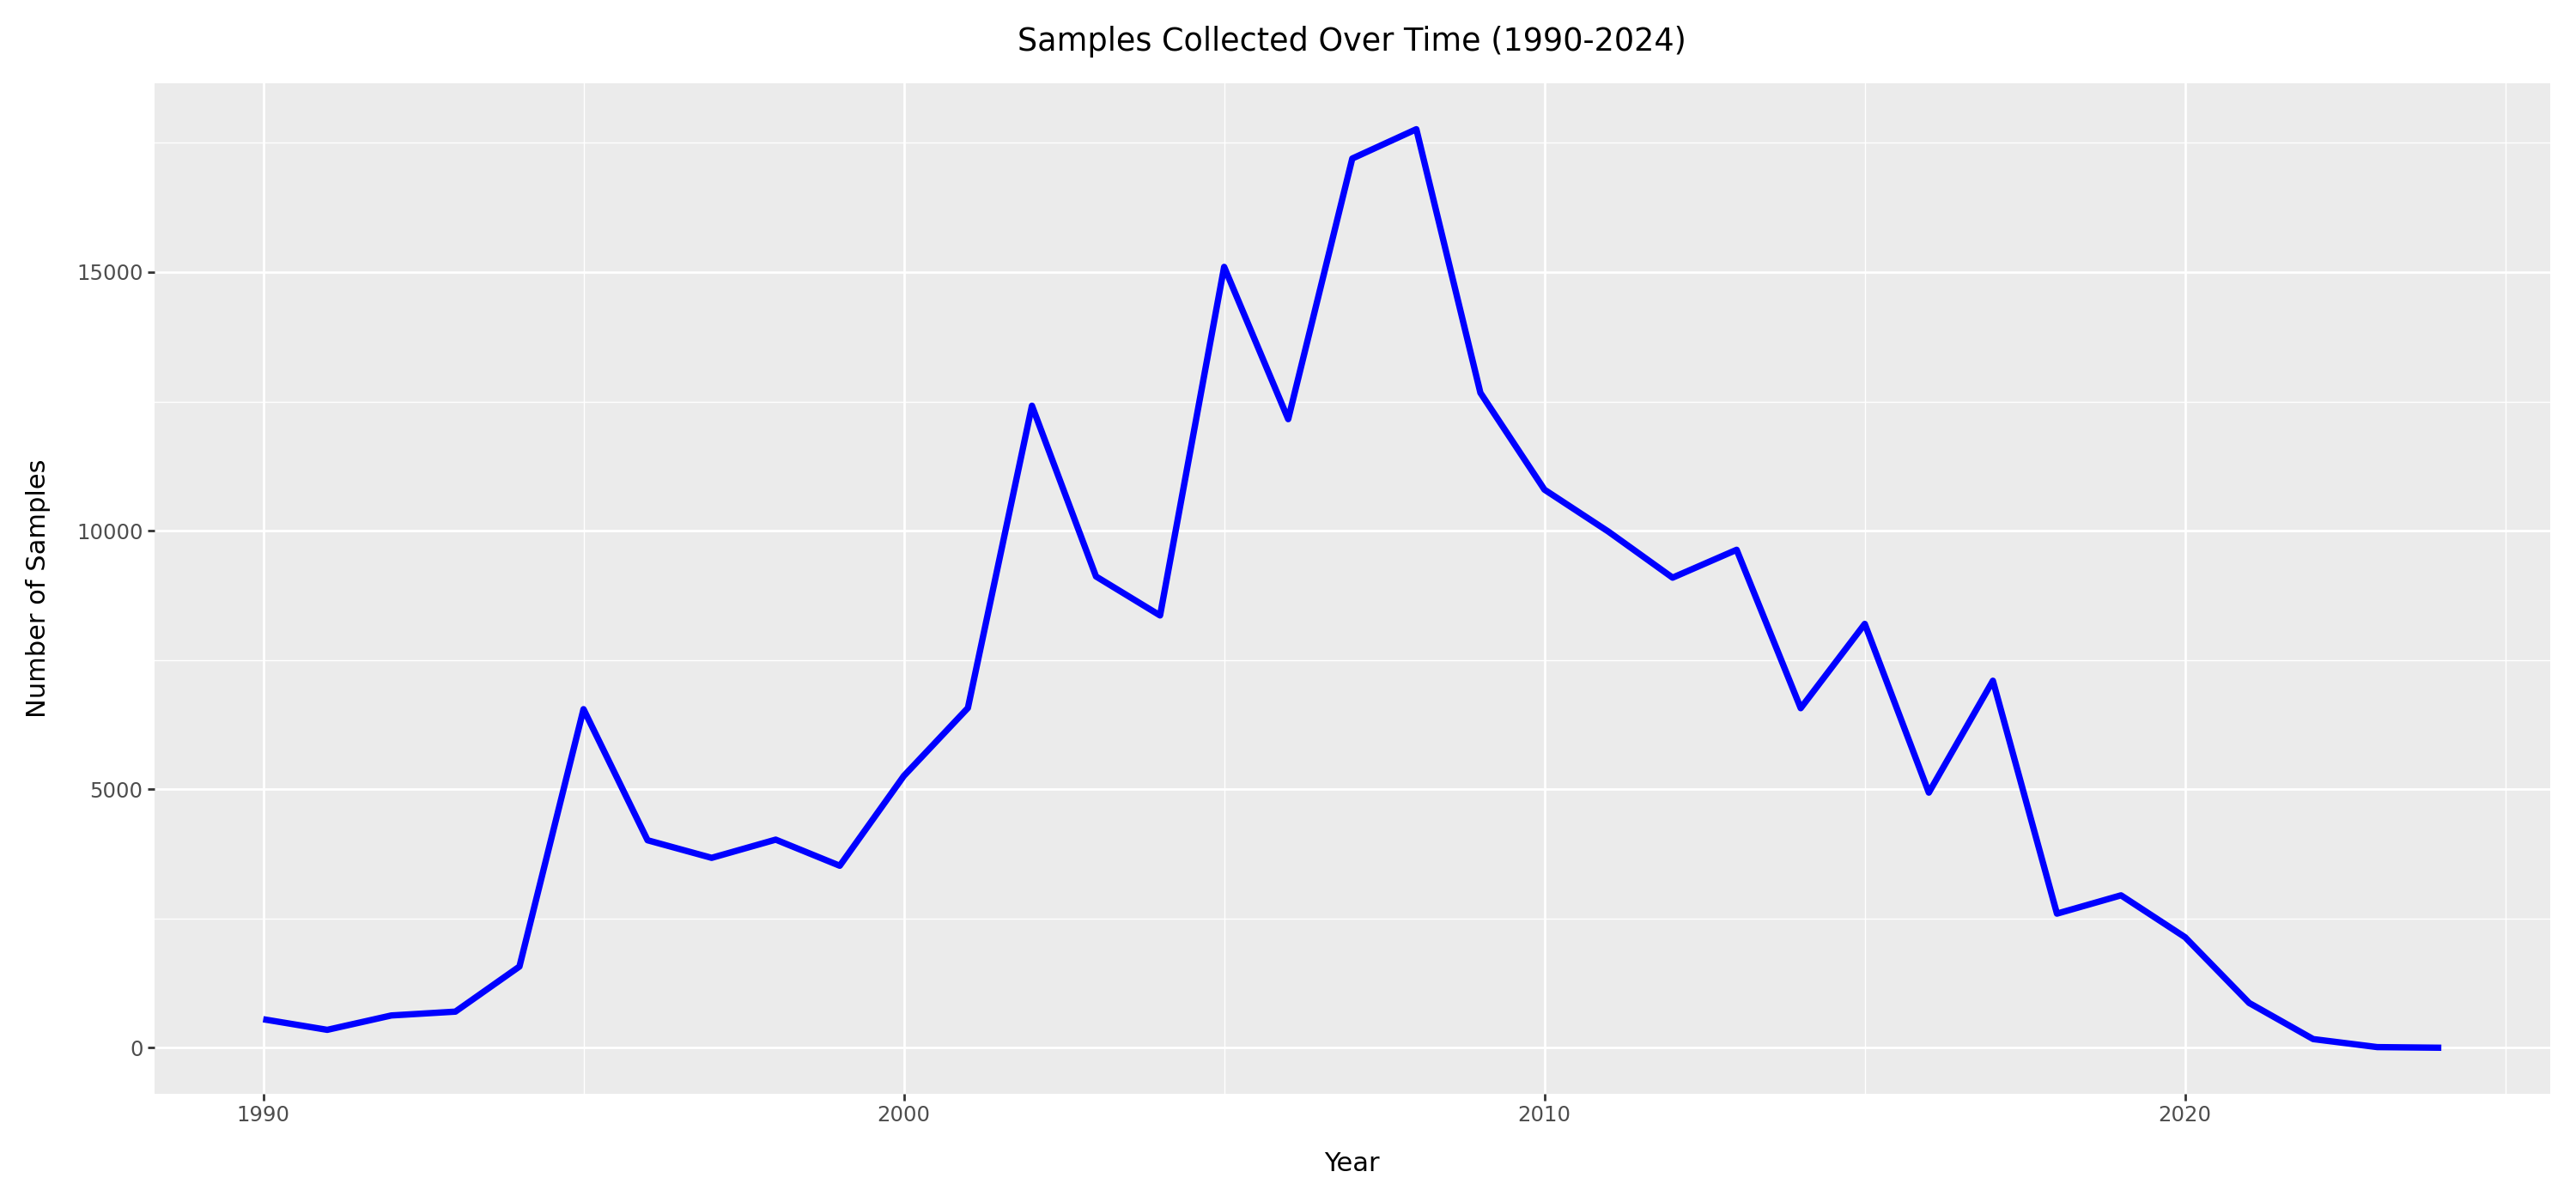

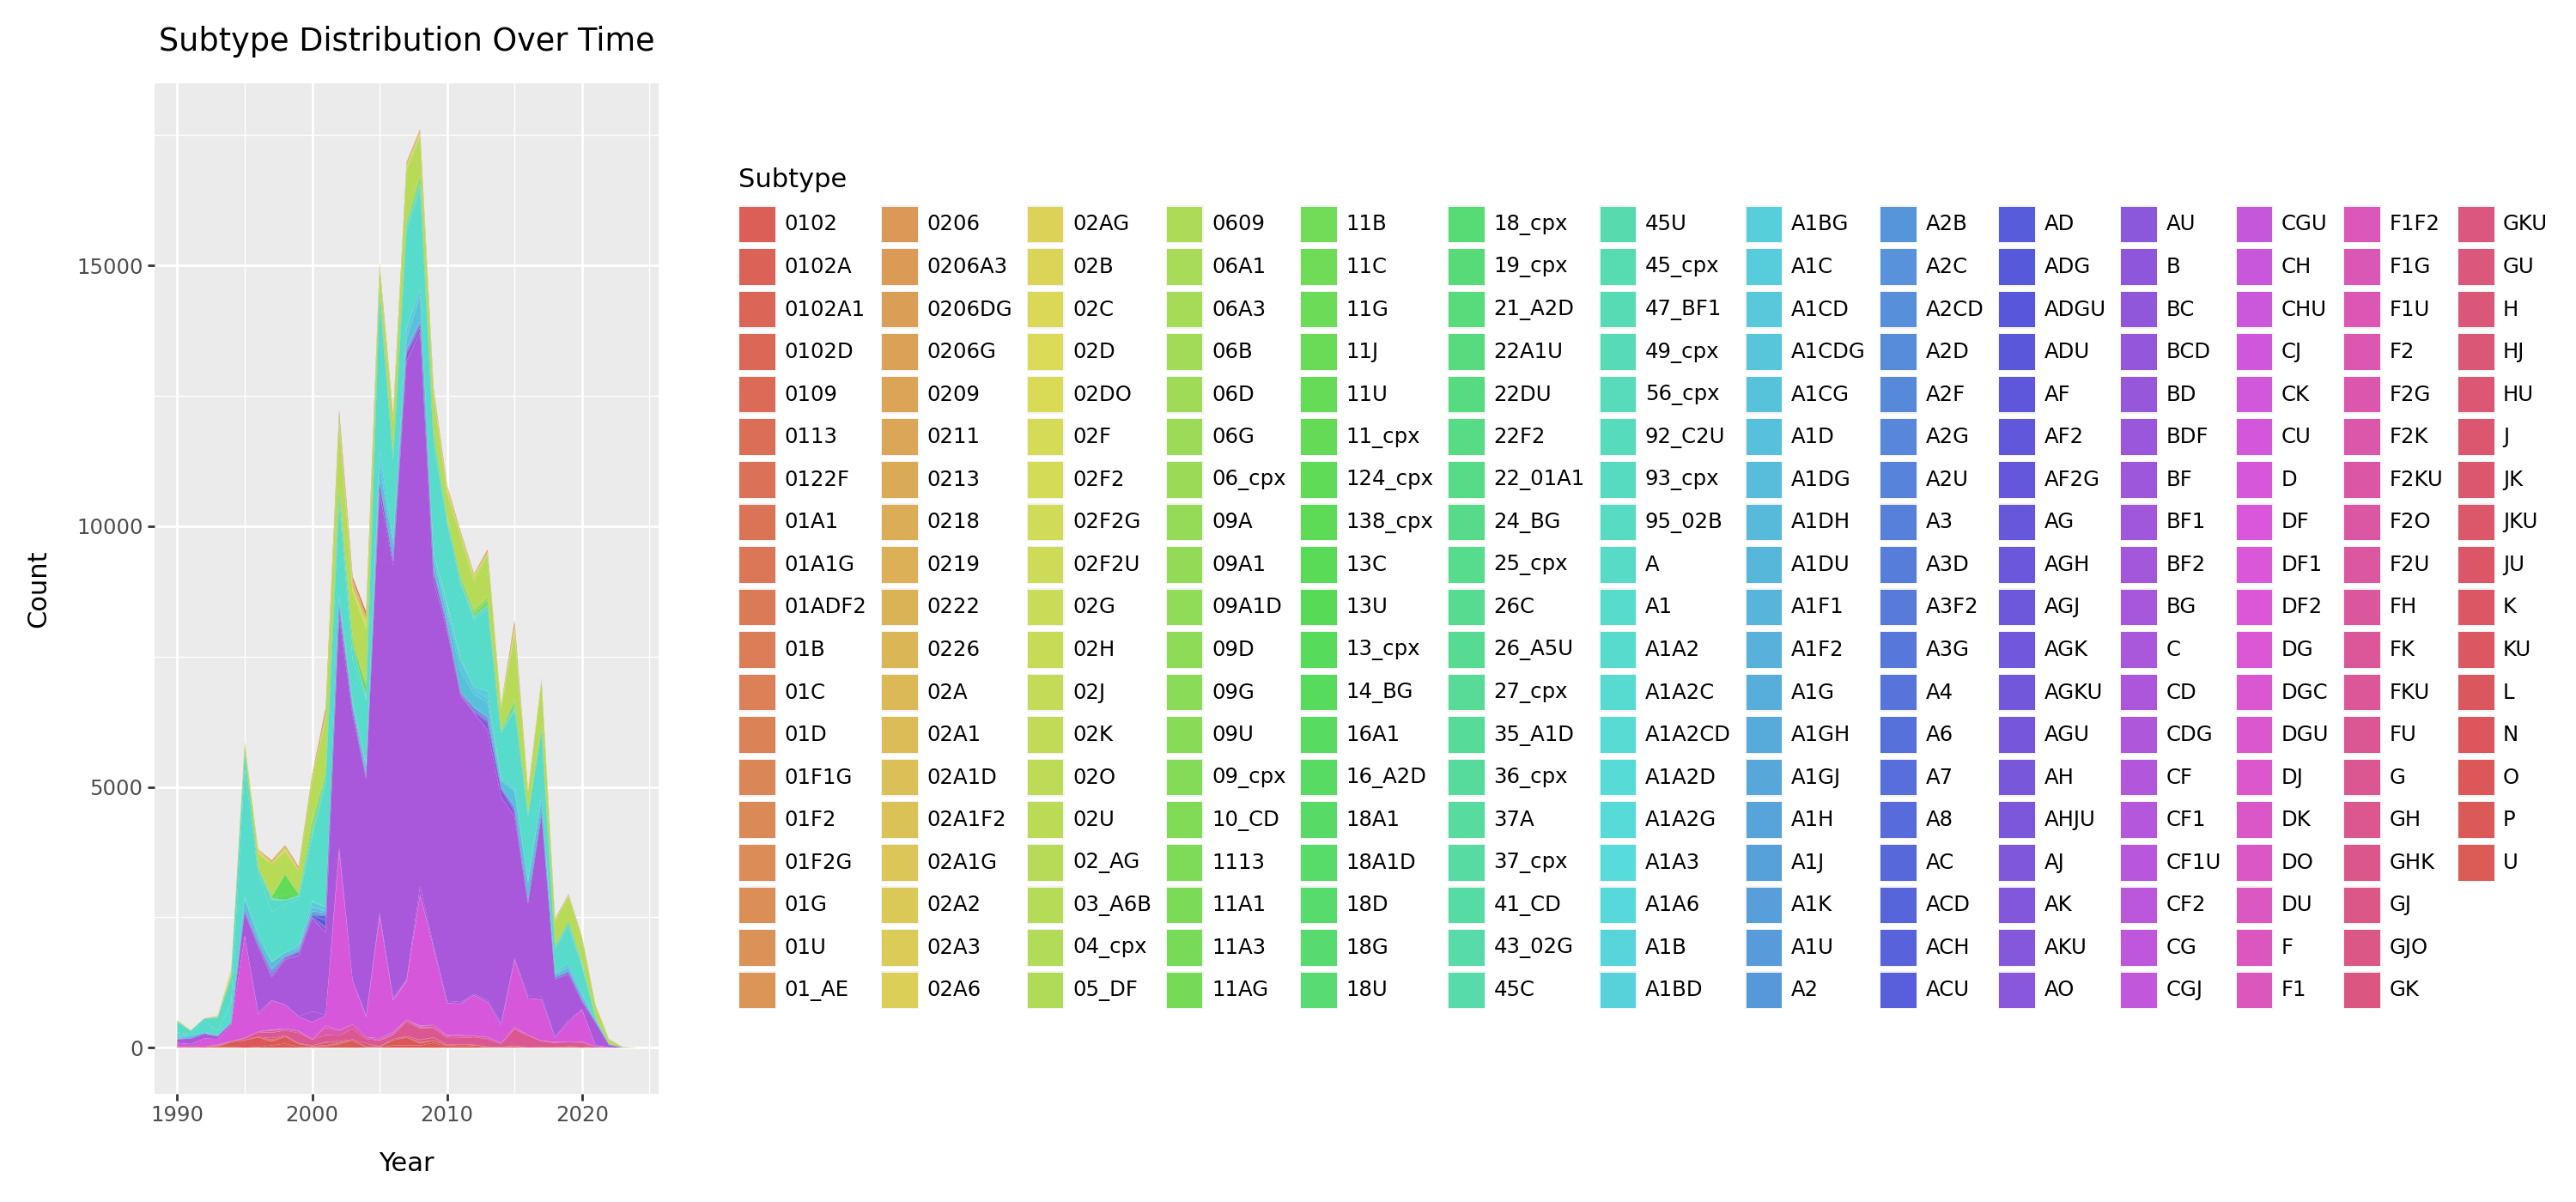

In [29]:
# Time series: samples collected per year
samples_per_year = df.groupby("Sampling Year").size().reset_index(name="Count")

plot_samples_per_year = (
    p9.ggplot(samples_per_year, p9.aes(x="Sampling Year", y="Count"))
    + p9.geom_line(color="blue", size=1.5)
    + p9.labs(
        title="Samples Collected Over Time (1990-2024)", x="Year", y="Number of Samples"
    )
    + p9.theme(figure_size=(15, 7))
)
print(plot_samples_per_year)

# Stacked area plot of subtypes over time
subtypes_per_year = (
    df.groupby(["Sampling Year", "Subtype"]).size().reset_index(name="Count")
)

plot_subtypes_per_year = (
    p9.ggplot(subtypes_per_year, p9.aes(x="Sampling Year", y="Count", fill="Subtype"))
    + p9.geom_area()
    + p9.labs(title="Subtype Distribution Over Time", x="Year", y="Count")
    + p9.theme(figure_size=(15, 7))
    + p9.theme(figure_size=(15, 7))
)
print(plot_subtypes_per_year)

###  Subtype Diversity Analysis

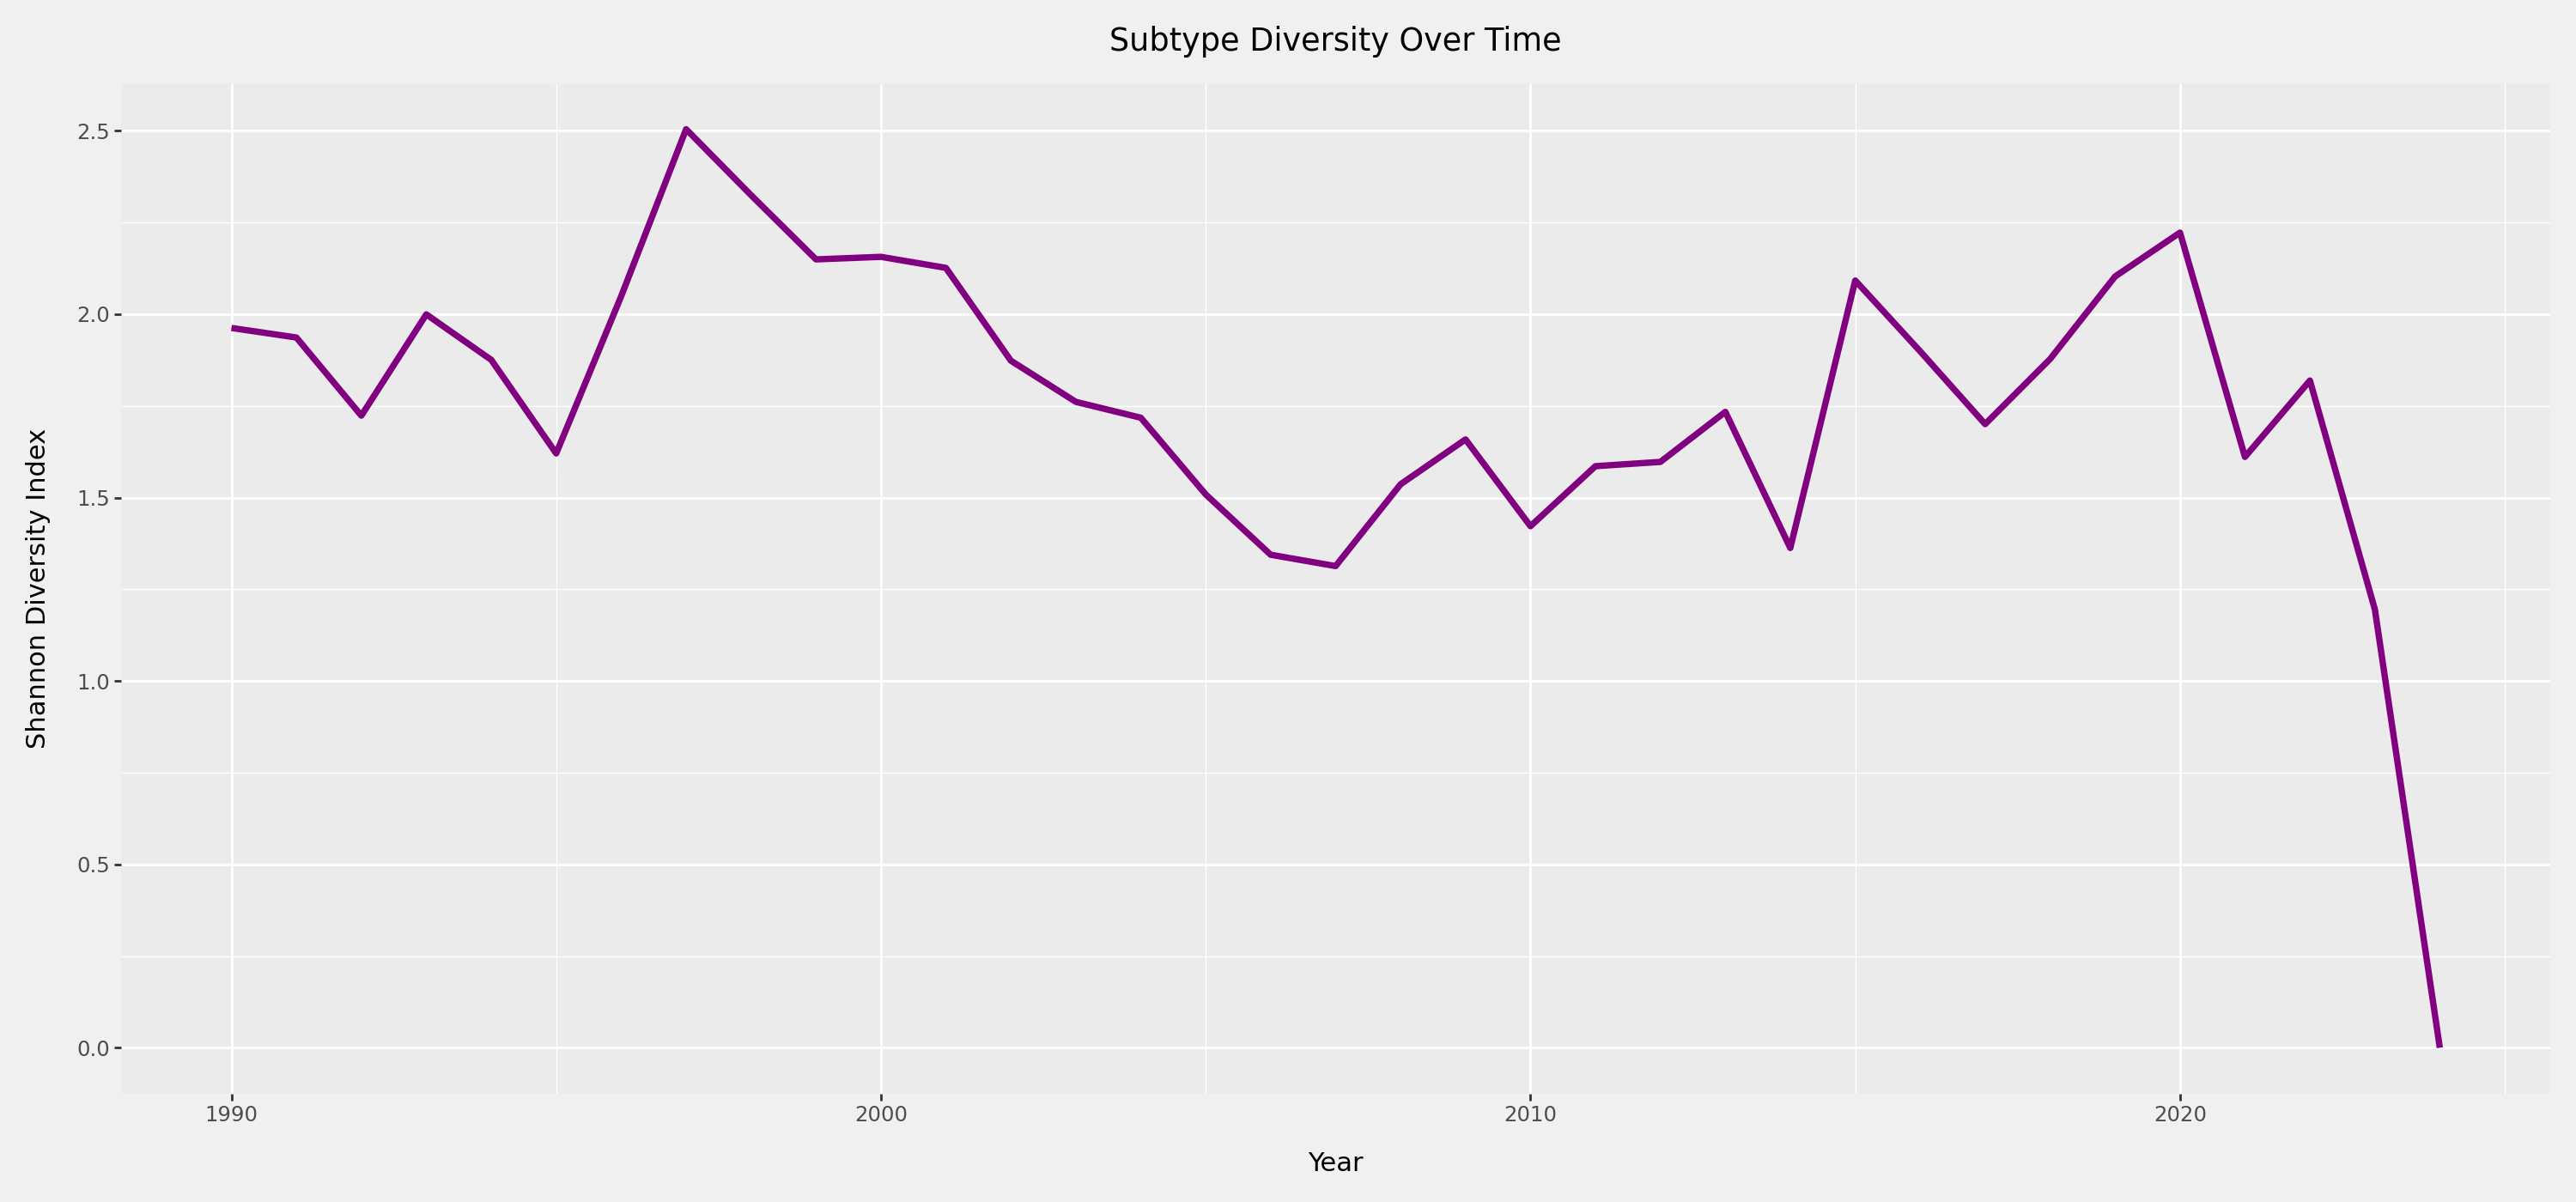

In [28]:
# Calculate Shannon Diversity Index (H')
def shannon_diversity(subtypes):
    return entropy(subtypes.value_counts())


# Apply diversity index calculation for each year
subtype_diversity = (
    df.groupby("Sampling Year")["Subtype"].apply(shannon_diversity).reset_index()
)

# Plot diversity index over time
plot_subtype_diversity = (
    p9.ggplot(subtype_diversity, p9.aes(x="Sampling Year", y="Subtype"))
    + p9.geom_line(color="purple", size=1.5)
    + p9.labs(
        title="Subtype Diversity Over Time", x="Year", y="Shannon Diversity Index"
    )
    + p9.theme(figure_size=(15, 7))
)
print(plot_subtype_diversity)

### Useful Tables

In [22]:
# Group by Sampling Year
yearly_summary = (
    df.groupby("Sampling Year")
    .agg(
        Total_Samples=("Accession", "size"),
        Subtype_Diversity=("Subtype", pd.Series.nunique),
        Average_Viral_Load=("Viral load", "mean"),
        Proportion_Drug_Naive=("Drug Naive", lambda x: (x == "Yes").mean()),
    )
    .reset_index()
)

# Display the summary table
yearly_summary.head()

,Sampling Year,Total_Samples,Subtype_Diversity,Average_Viral_Load,Proportion_Drug_Naive
0,1990,553,23,NaN,0.0
1,1991,348,17,NaN,0.0
2,1992,626,20,NaN,0.0
3,1993,700,28,37750.0,0.0
4,1994,1572,34,448516.0,0.0


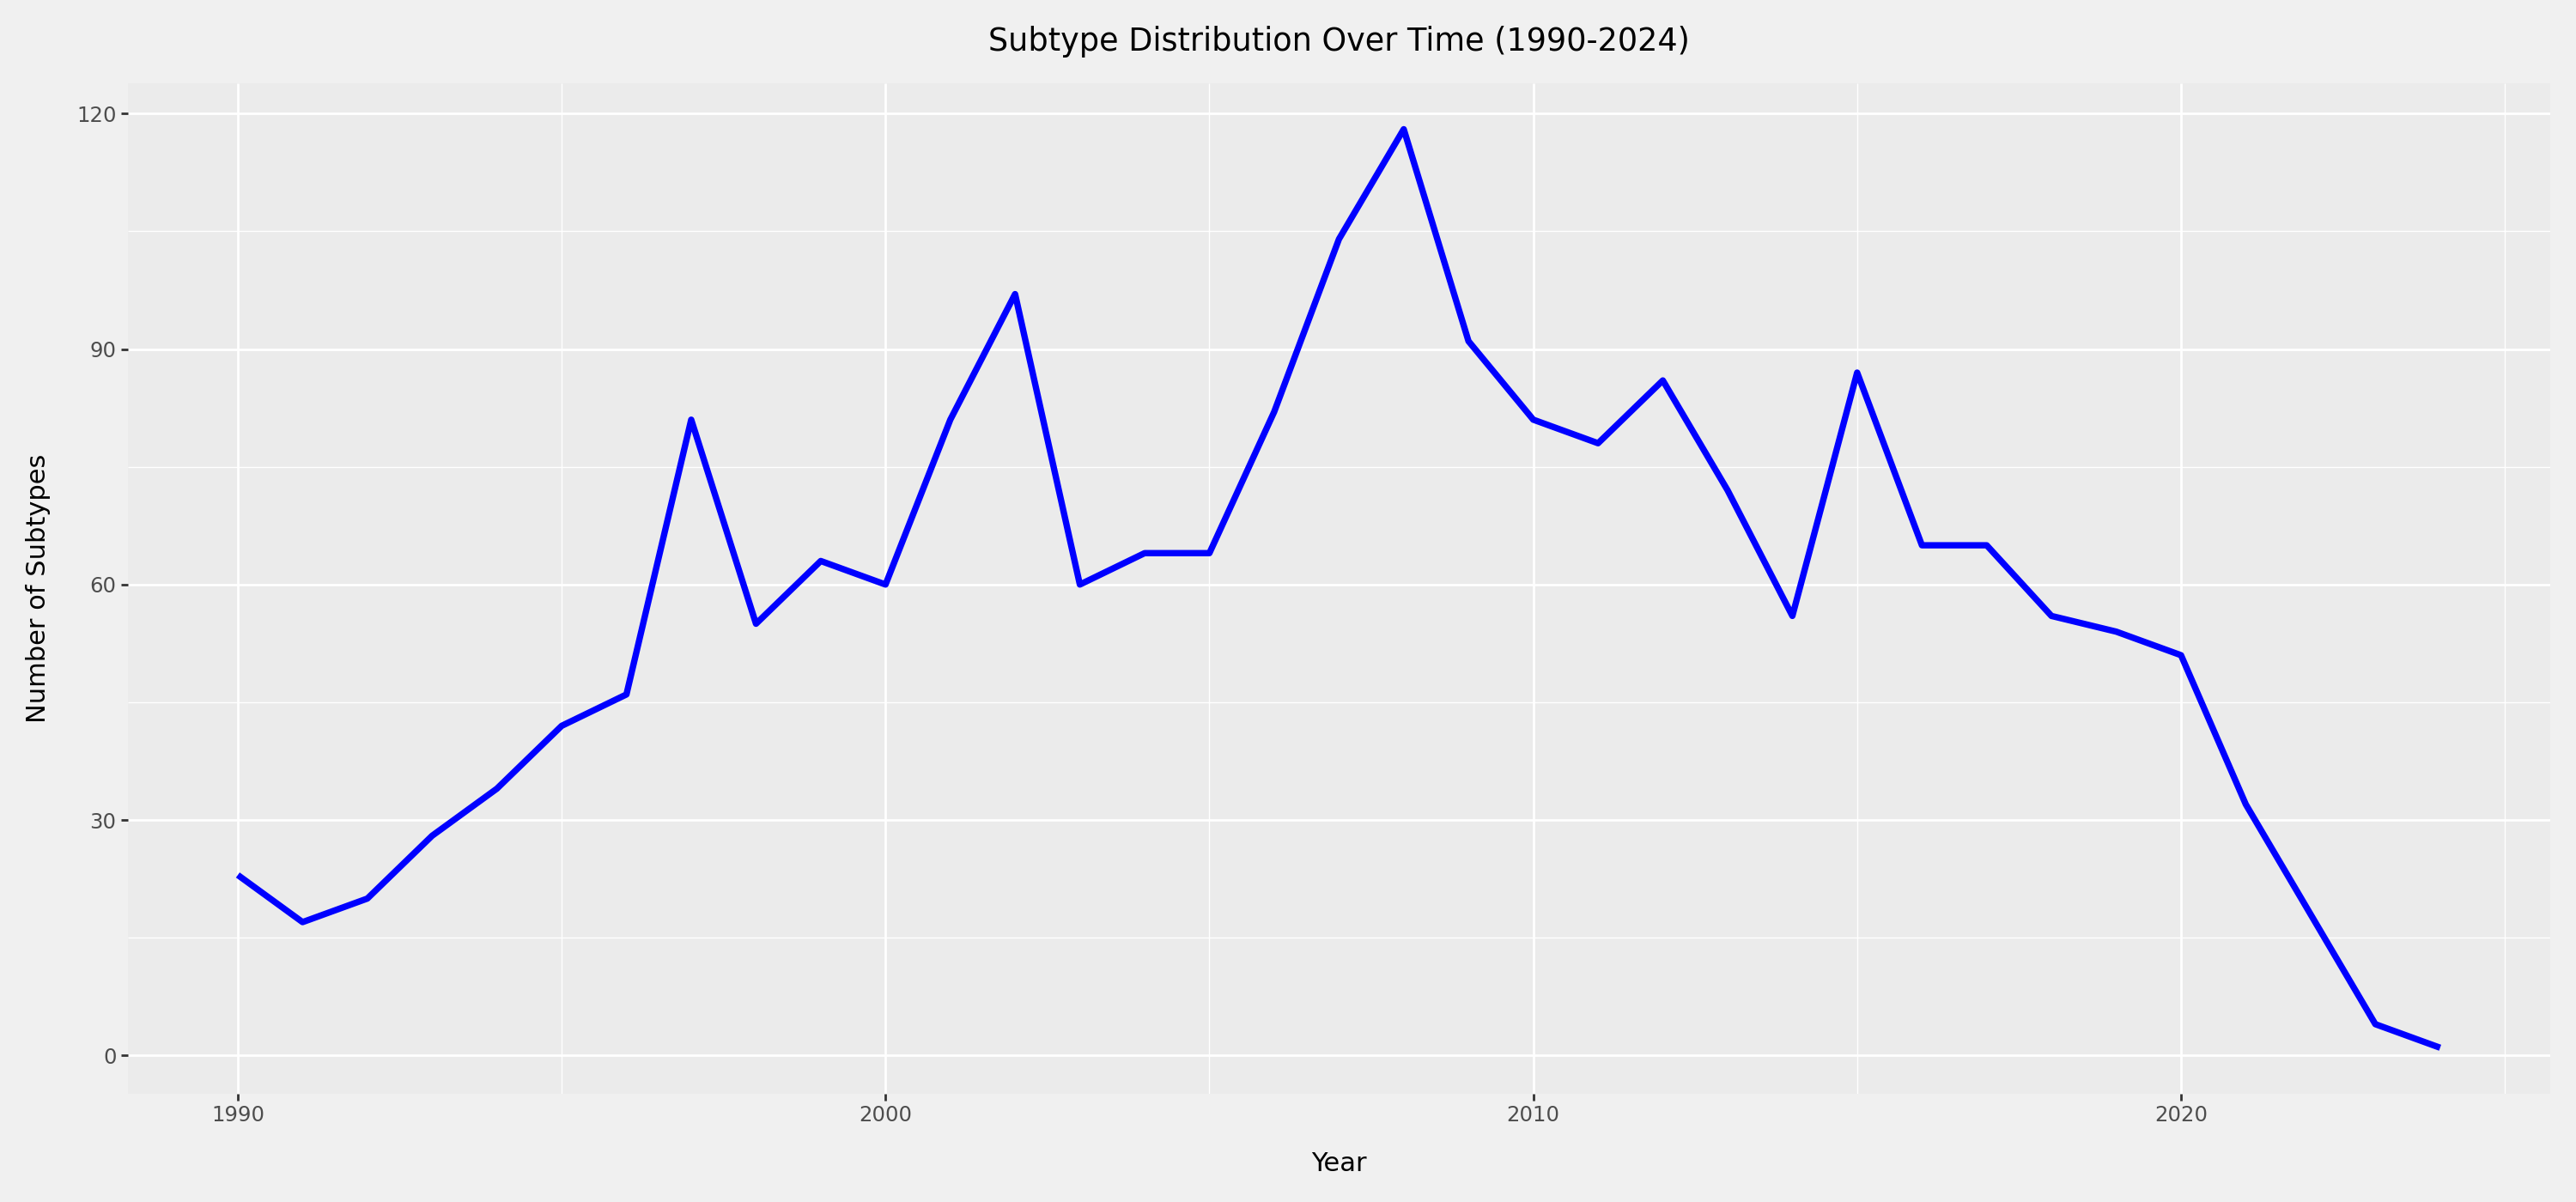

In [24]:
plot_subtypes_per_year = (
    p9.ggplot(yearly_summary, p9.aes(x="Sampling Year", y="Subtype_Diversity"))
    + p9.geom_line(color="blue", size=1.5)
    + p9.labs(
        title="Subtype Distribution Over Time (1990-2024)", x="Year", y="Number of Subtypes"
    )
    + p9.theme(figure_size=(15, 7))
)

print(plot_subtypes_per_year)

In [36]:
# Subtype Summary
subtype_summary = (
    df.groupby(['Subtype', 'Country'])
    .agg(
        Total_Sample = ("Accession", "size"),
    ).sort_values(by=["Total_Sample"], ascending=[False])
)

subtype_summary

Total_Sample
Subtype Country                   
C       SOUTH AFRICA         42780
        MALAWI               19869
D       UGANDA               18300
A1      KENYA                15574
C       ZAMBIA               12796
...                            ...
18A1D   ZAMBIA                   0
        ZIMBABWE                 0
18D     ALGERIA                  0
        ANGOLA                   0
U       ZIMBABWE                 0

[12887 rows x 1 columns]

In [27]:
# Group by Country
geographical_summary = (
    df.groupby("Country")
    .agg(
        Total_Samples=("Accession", "size"),
        Common_Subtype=(
            "Subtype",
            lambda x: x.mode()[0] if not x.mode().empty else "Unknown",
        ),
        Average_Viral_Load=("Viral load", "mean"),
        Proportion_Drug_Naive=("Drug Naive", lambda x: (x == "Yes").mean()),
    )
    .reset_index()
)

# Display the summary table
geographical_summary

,Country,Total_Samples,Common_Subtype,Average_Viral_Load,Proportion_Drug_Naive
0,ALGERIA,706,B,NaN,0.0
1,ANGOLA,1001,C,NaN,0.0
2,BENIN,790,02_AG,NaN,0.0
3,BOTSWANA,11224,C,1.808689e+07,0.0
4,BURKINA FASO,724,02_AG,3.008488e+05,0.0
5,BURUNDI,531,C,3.981000e+03,0.0
6,CAMEROON,16873,02_AG,9.092525e+07,0.0
7,CAPE VERDE,228,G,NaN,0.0
8,CENTRAL AFRICAN REPUBLIC,1738,11_cpx,1.157916e+06,0.0
9,CHAD,276,D,NaN,0.0
